# Project 2: Analysis of factors affecting medical appointment attendance in Brazilian health centers.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

Medical appointment information gathered from Brazilian health centers; regarding appointment attendance, scheduling date, hospital location, patient medical history and patient enrollment in welfare programs.

Sample size: 110527 appointments.

**Data Dictionary**

01 - PatientId:
Identification of a patient

02 - AppointmentID:
Identification of each appointment

03 - Gender:
Male (M) or Female (F).

04 - AppointmentDay:
The day of the actuall appointment, when they have to visit the doctor.

05 - ScheduledDay:
The day someone called or registered the appointment, this is before appointment of course.

06 - Age (years):
How old is the patient.

07 - Neighbourhood:
Where the appointment takes place.

08 - Scholarship:
True (1) or False (0). 

09 - Hipertension:
True (1) or False (0).

10 - Diabetes:
True (1) or False (0).

11 - Alcoholism:
True (1) or False (0).

12 - Handcap:
True (1) or False (0).

13 - SMS_received:
True (1) or False (0).
1 or more messages sent to the patient.

14 - No-show:
Yes (didn't attend) or No (attended)

### Question(s) for Analysis

1. Is the patient's age a factor influencing attendance?

2. Is the attendance to the the medical appointments greater if the patient received at least 1 SMS? 

3. Is the patient's gender a factor influencing attendance?


In [628]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

1. Loading and initial exploration of data

In [592]:
#Loading data and inspecting first 5 rows.

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [593]:
#Inspect shape of dataframe
df.shape

(110527, 14)

In [594]:
# Inspect data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [595]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [596]:
#Looking for null values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

No null values found

In [597]:
#dropping columns not used in the analysis
df.drop(['ScheduledDay', 'AppointmentDay','Neighbourhood','Scholarship','Hipertension', 'Diabetes','Alcoholism', 'Handcap'],axis=1,inplace=True)
df.head()

,PatientId,AppointmentID,Gender,Age,SMS_received,No-show
0,2.987250e+13,5642903,F,62,0,No
1,5.589978e+14,5642503,M,56,0,No
2,4.262962e+12,5642549,F,62,0,No
3,8.679512e+11,5642828,F,8,0,No
4,8.841186e+12,5642494,F,56,0,No


In [598]:
#Evaluating unique values per column, verifying that all appointment Ids are unique
df.nunique()

PatientId         62299
AppointmentID    110527
Gender                2
Age                 104
SMS_received          2
No-show               2
dtype: int64

Since the amount of unique values for appointment ID (110527) is equal to the number of entries, we can say that no duplicate appointments are being considered. 


### Data Cleaning 

In [599]:
#changing 'No-show' column name to Attended
df.rename(columns = {'No-show':'Attended'}, inplace = True)
df.head()

,PatientId,AppointmentID,Gender,Age,SMS_received,Attended
0,2.987250e+13,5642903,F,62,0,No
1,5.589978e+14,5642503,M,56,0,No
2,4.262962e+12,5642549,F,62,0,No
3,8.679512e+11,5642828,F,8,0,No
4,8.841186e+12,5642494,F,56,0,No


In [600]:
df.Attended.unique()

array(['No', 'Yes'], dtype=object)

In [601]:
#replacing Attendance values "Yes" with False and "No" with True to fit the new column description
df= df.replace({'Attended':{'Yes':False,'No':True}})
df.head()

,PatientId,AppointmentID,Gender,Age,SMS_received,Attended
0,2.987250e+13,5642903,F,62,0,True
1,5.589978e+14,5642503,M,56,0,True
2,4.262962e+12,5642549,F,62,0,True
3,8.679512e+11,5642828,F,8,0,True
4,8.841186e+12,5642494,F,56,0,True


In [602]:
#confirming that the change was made correctly
df.Attended.unique()

array([ True, False])

In [603]:
#replacing SMS_received values 0 with False and 1 with True
df= df.replace({'SMS_received':{0:False,1:True}})
df.head()

,PatientId,AppointmentID,Gender,Age,SMS_received,Attended
0,2.987250e+13,5642903,F,62,False,True
1,5.589978e+14,5642503,M,56,False,True
2,4.262962e+12,5642549,F,62,False,True
3,8.679512e+11,5642828,F,8,False,True
4,8.841186e+12,5642494,F,56,False,True


In [604]:
#confirming that the change was made correctly
df.SMS_received.unique()

array([False,  True])

In [647]:
#verifying that SMS_received and Attended are now boolean columns
df.dtypes

PatientId        object
AppointmentID    object
Gender           object
Age               int64
SMS_received       bool
Attended           bool
dtype: object

In [606]:
#changing PatientId from float type to string type.
df.PatientId = df.PatientId.astype(str)

#changing AppointmentId from float type to string type.
df.AppointmentID = df.AppointmentID.astype(str)

#verifying that the change was made
df.dtypes

PatientId        object
AppointmentID    object
Gender           object
Age               int64
SMS_received       bool
Attended           bool
dtype: object

In [607]:
df.head()

,PatientId,AppointmentID,Gender,Age,SMS_received,Attended
0,29872499824296.0,5642903,F,62,False,True
1,558997776694438.0,5642503,M,56,False,True
2,4262962299951.0,5642549,F,62,False,True
3,867951213174.0,5642828,F,8,False,True
4,8841186448183.0,5642494,F,56,False,True


In [608]:
#Reviewing Age values
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

Since there is a negative Age value, which is not possible, it needs to be changed:

In [609]:
#identifying the row with the negative age value
df.loc[df['Age'] == -1]

,PatientId,AppointmentID,Gender,Age,SMS_received,Attended
99832,465943158731293.0,5775010,F,-1,False,True


37.08887421173107

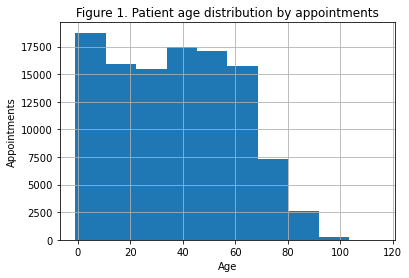

In [610]:
#Looking at the Age distribution and age mean
df.hist('Age')
plt.title('Figure 1. Patient age distribution by appointments')
plt.ylabel('Appointments')
plt.xlabel('Age')
age_mean= df["Age"].mean()
age_mean

In [611]:
#changing age mean from float type to integer type.
age_mean = int(age_mean)
age_mean

37

In [612]:
#replacing the negative age with the age mean
df.at[99832,'Age']= age_mean

In [613]:
#verifying that the change was made correctly 
df.loc[df['AppointmentID'] == "5775010"]

,PatientId,AppointmentID,Gender,Age,SMS_received,Attended
99832,465943158731293.0,5775010,F,37,False,True


-----

<a id='eda'></a>
## Exploratory Data Analysis

**Research Question 1.** Is the patient's age a factor influencing attendance?

Evaluating the mean age of patients that did and did not attend to the appointments:

In [614]:
#creating a mask to filter by attendance to the meeting
attended = df.Attended == True
not_attended = df.Attended == False

In [615]:
#Average age of patients that attended the appointments:
df.Age[attended].mean()

37.79049519317976

In [616]:
#Average age of patients that did not attend the appointments:
df.Age[not_attended].mean()

34.31766656212196

The average age for patients that attended appointments is higher than those that didn't attend.

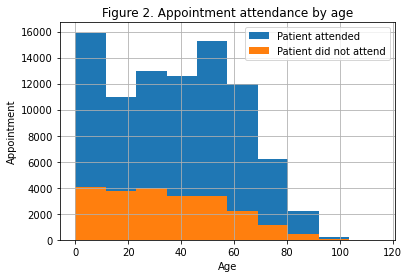

In [713]:
#Visualization of Appointment attendance by age
df.Age[attended].hist(label="Patient attended")
df.Age[not_attended].hist(label="Patient did not attend")
plt.title('Figure 2. Appointment attendance by age')
plt.ylabel('Appointment')
plt.xlabel('Age')
plt.legend()

TypeError: object of type 'AxesSubplot' has no len()

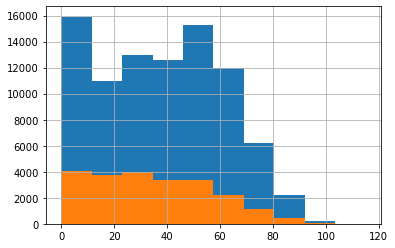

In [722]:
#creating a function for bar charts:
def bar_plot(x,y,h, xlabel,ylabel):
    ax = plt.subplot(1,1,1)
    ax.bar(x)
    ax.bar(y)
    ax.bar(h)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    plt.legend()
    plt.show()

x = df.Age[attended].hist(label="Patient attended")
y = df.Age[not_attended].hist(label="Patient did not attend")

hist_plot(x, y, 100,'Age', 'Appointment')

According to Figure 2, a majority of appointments had successful attendance. The distributions of age are skewed to the left, which is related to the study sample having a greater percentage of younger people. A couple of peaks are evidenced in the age distribution, under 20 and in the range of 40 to 60. 

Looking into specific age group attendance:

In [618]:
#Creating age groups: minors (<18), young adults (18-35), adults (35-65) and seniors (>65)
age_groups = pd.cut(df['Age'], bins=[0,18, 35, 65, np.inf])

In [619]:
#Checking attendance percentage per age group
pd.crosstab(age_groups,df["Attended"],normalize="index")

Attended,False,True
Age,,
"(0.0, 18.0]",0.225372,0.774628
"(18.0, 35.0]",0.238348,0.761652
"(35.0, 65.0]",0.184361,0.815639
"(65.0, inf]",0.155327,0.844673


Text(0.5, 0, 'Age group')

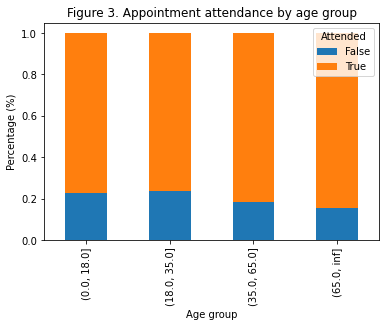

In [717]:
#visual representation of attendance by age
pd.crosstab(age_groups,df["Attended"],normalize="index").plot(kind='bar', stacked=True)
plt.title('Figure 3. Appointment attendance by age group')
plt.ylabel('Percentage (%)')
plt.xlabel('Age group')

According to Figure 3, adult and senior patient appointments had a higher attendance percentage, than minors and young adult patients. Young adults was the age group with the lowest attendance percentage and Seniors had the greatest attendance. Age is a factor that can influence attendance, since older people were more likely to attend to the doctor appointments.

----


**Research Question 2.** Is the attendance to the the medical appointments higher by patients that received at least 1 SMS?

The percentage of successful attendance appointments whose patient received at least 1 SMS is evaluated next:

In [621]:
#Looking to attendance percentages by reception of SMS
pd.crosstab(df.Attended,df.SMS_received, normalize='index')

SMS_received,False,True
Attended,,
False,0.561629,0.438371
True,0.708666,0.291334


Text(0.5, 0, 'Attendance')

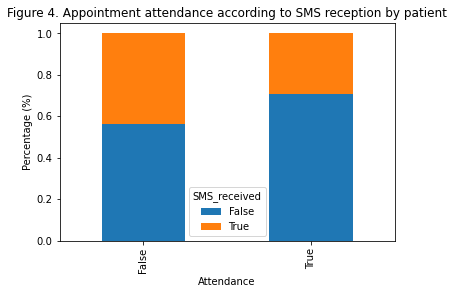

In [622]:
# normalizing the results
pd.crosstab(df.Attended,df.SMS_received, normalize='index').plot(kind='bar', stacked=True)
plt.title('Figure 4. Appointment attendance according to SMS reception by patient')
plt.ylabel('Percentage (%)')
plt.xlabel('Attendance')

As shown in Figure 4., in less than 30% of successful attendance appointments an SMS was received by the patient. And for unssuccesful attendance appointments, the percentage of SMS received by patient was greater (44% aproximately). Receiving an SMS is not related to improved attendance.

Text(0.5, 0, 'SMS reception')

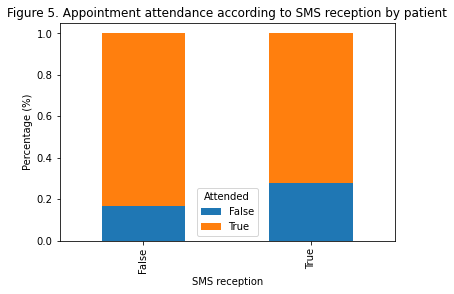

In [623]:
# normalizing the results
pd.crosstab(df.SMS_received,df.Attended, normalize='index').plot(kind='bar', stacked=True)
plt.title('Figure 5. Appointment attendance according to SMS reception by patient')
plt.ylabel('Percentage (%)')
plt.xlabel('SMS reception')

As shown in Figure 5., when an SMS was received by patients the attendance percentage was lower than when patients didn't receive the SMS. Receiving an SMS is not related to improved attendance.

**Research Question 3.** Is the patient's gender a factor influencing attendance?

In [624]:
#Looking to attendance percentages by gender
pd.crosstab(df.Gender,df.Attended, normalize='index')

Attended,False,True
Gender,,
F,0.203146,0.796854
M,0.199679,0.800321


Text(0.5, 0, 'Gender')

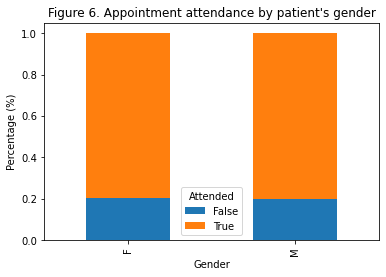

In [625]:
#visualization of attendance by gender (F= female, M= male)
pd.crosstab(df.Gender,df.Attended, normalize='index').plot(kind='bar', stacked=True)
plt.title("Figure 6. Appointment attendance by patient's gender")
plt.ylabel('Percentage (%)')
plt.xlabel('Gender')

According to Figure 6, the percentage of successful attendance appointments is very similar for both females and males with a value of around 80%. Gender didn't influence  successful attendance to appointments. 

---